# Парсинг

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
base_url = "https://irecommend.ru/catalog/reviews/27?page={}"
reviews = pd.DataFrame(columns=["Review"])

for page in range(100):
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    titles = soup.find_all("div", {"class": "reviewTextSnippet"})
    for title in titles:
        reviews = pd.concat([reviews, pd.DataFrame({"Review": [title.text.strip()]})], ignore_index=True)
    
reviews.head()

,Review
0,Неприятно проведенный отдых\nОтпуск на море мы...
1,Небольшой отель в городе Сочи недалеко от парк...
2,Захотелось снова сыграть свадьбу). Славное мес...
3,Решено дать Ялте-Интурист второй шанс\nРешили ...
4,"Отдых для души\nДорогие друзья, С большим вост..."


In [ ]:
reviews.shape

(400, 1)

# Подготовка данных

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

#Удаление стоп-слов и приведение к нижнему регистру
def clear_from_stopwords(message):
    message = message.split()
    myList = []
    russian_stopwords = stopwords.words("russian") + ["это", "который", "наш", "мочь", "год", 
                                      "такой", "знать", "мы", "свой", "один", "другой", "хотеть",
                                      "человек", "всё", "все", "весь", "очень", "думать", "нужно",
                                      "большой", "время", "использовать", "говорить", "сказать",
                                      "иметь", "сделать", "первый", "каждый", "день", "её", "ваш",
                                      "стать", "больший", "ваше", "день", "самый", "понять",
                                      "просто", "ещё", "проблема", "также", "например", "делать", 
                                      "вещь", "хороший", "спасибо", "й"]
    for word in message:
        word = word.lower()
        if word not in russian_stopwords:
            myList.append(word)
    return myList


# Применение функции для каждого отзыва в датафрейме
reviews_1 = reviews.copy()
reviews_1['Review'] = reviews['Review'].apply(clear_from_stopwords)
reviews_1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review
0,"[неприятно, проведенный, отдых, отпуск, море, ..."
1,"[небольшой, отель, городе, сочи, недалеко, пар..."
2,"[захотелось, снова, сыграть, свадьбу)., славно..."
3,"[решено, дать, ялте-интурист, второй, шанс, ре..."
4,"[отдых, души, дорогие, друзья,, большим, восто..."
...,...
395,"[""по, планете, круговерти, ходит, нами, бог......"
396,"[уютная, база, отдыха, горах!, базу, четыре, с..."
397,"[отличный, отдых, семьи., замечательный, отель..."
398,"[лучший, отель, центре, каира, категории, цена..."


In [ ]:
import string
import re

#Удаление пунктуации
def clear_message_punctuation(message):
    clean_text = ""
    string_punctuation = string.punctuation + "—" + "«" + "»" + "1" + "2" + "3" + "4" +"5" + "6" + "7" + "8" + "9" + "0"
    
    for text in message:
        for ch in string_punctuation:
            text = text.replace(ch, "")
        clean_text += text + " "  # Append the cleaned text to the result
    
    return clean_text.strip()


reviews_1['Review'] = reviews_1['Review'].apply(clear_message_punctuation)

In [ ]:
reviews_1

,Review
0,неприятно проведенный отдых отпуск море задума...
1,небольшой отель городе сочи недалеко парка рив...
2,захотелось снова сыграть свадьбу славное место...
3,решено дать ялтеинтурист второй шанс решили ре...
4,отдых души дорогие друзья большим восторгом хо...
...,...
395,по планете круговерти ходит нами бог абхазии п...
396,уютная база отдыха горах базу четыре сезона по...
397,отличный отдых семьи замечательный отельотзывч...
398,лучший отель центре каира категории ценакачест...


In [ ]:
import re

def remove_smileys(text):
    pattern = re.compile("["
                         u"\U0001F600-\U0001F64F"  # смайлы Emojis
                         u"\U0001F300-\U0001F5FF"  # символы & пиктограммы
                         u"\U0001F680-\U0001F6FF"  # символы транспорта и карты
                         u"\U0001F1E0-\U0001F1FF"  # национальные флаги
                         "]+", flags=re.UNICODE)
    return pattern.sub(r'', text)

reviews_1['Review'] = reviews_1['Review'].apply(remove_smileys)

In [ ]:
reviews_1

,Review
0,неприятно проведенный отдых отпуск море задума...
1,небольшой отель городе сочи недалеко парка рив...
2,захотелось снова сыграть свадьбу славное место...
3,решено дать ялтеинтурист второй шанс решили ре...
4,отдых души дорогие друзья большим восторгом хо...
...,...
395,по планете круговерти ходит нами бог абхазии п...
396,уютная база отдыха горах базу четыре сезона по...
397,отличный отдых семьи замечательный отельотзывч...
398,лучший отель центре каира категории ценакачест...


In [ ]:
from nltk.tokenize import word_tokenize

for i, row in reviews_1.iterrows():
    reviews_1.at[i, 'Review'] = word_tokenize(row['Review'])

In [ ]:
reviews_1

,Review
0,"[неприятно, проведенный, отдых, отпуск, море, ..."
1,"[небольшой, отель, городе, сочи, недалеко, пар..."
2,"[захотелось, снова, сыграть, свадьбу, славное,..."
3,"[решено, дать, ялтеинтурист, второй, шанс, реш..."
4,"[отдых, души, дорогие, друзья, большим, востор..."
...,...
395,"[по, планете, круговерти, ходит, нами, бог, аб..."
396,"[уютная, база, отдыха, горах, базу, четыре, се..."
397,"[отличный, отдых, семьи, замечательный, отельо..."
398,"[лучший, отель, центре, каира, категории, цена..."


In [ ]:
!pip install pymorphy2

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

**Вместо стемминга, лучше использовать лемматизацию, которая учитывает контекст и грамматику и приводит слова к их базовой форме.**

In [ ]:
def lemmatize_text(text):
    lemmas = []
    for word in text:
        parsed_word = morph.parse(word)[0]
        lemma = parsed_word.normal_form
        lemmas.append(lemma)
    return lemmas

In [ ]:
reviews_1['Review'] = reviews_1['Review'].apply(lemmatize_text)

In [ ]:
reviews_1

,Review
0,"[неприятно, провести, отдых, отпуск, море, зад..."
1,"[небольшой, отель, город, сочи, недалеко, парк..."
2,"[захотеться, снова, сыграть, свадьба, славный,..."
3,"[решить, дать, ялтеинтурист, второй, шанс, реш..."
4,"[отдых, душа, дорогой, друг, больший, восторг,..."
...,...
395,"[по, планета, круговерть, ходить, мы, бог, абх..."
396,"[уютный, база, отдых, гора, база, четыре, сезо..."
397,"[отличный, отдых, семья, замечательный, отельо..."
398,"[хороший, отель, центр, каир, категория, ценак..."


# Частотный анализ биграмм и униграмм и построение облака/облаков слов

In [ ]:
import nltk
from nltk import bigrams, FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#Список всех униграмм
all_unigrams = [word for review in reviews_1['Review'] for word in review]

#Частотность униграмм
unigram_freq = FreqDist(all_unigrams)

#Список всех биграмм
all_bigrams = [bigram for review in reviews_1['Review'] for bigram in list(bigrams(review))]

#Частотность биграмм
bigram_freq = FreqDist(all_bigrams)


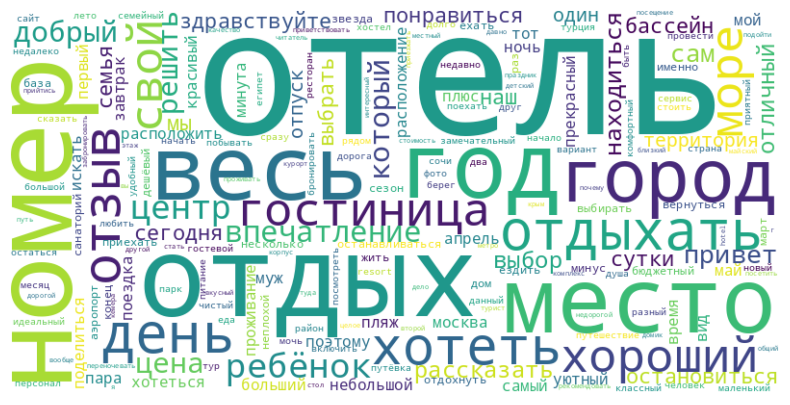

In [ ]:
#Облако слов из униграмм
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(unigram_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

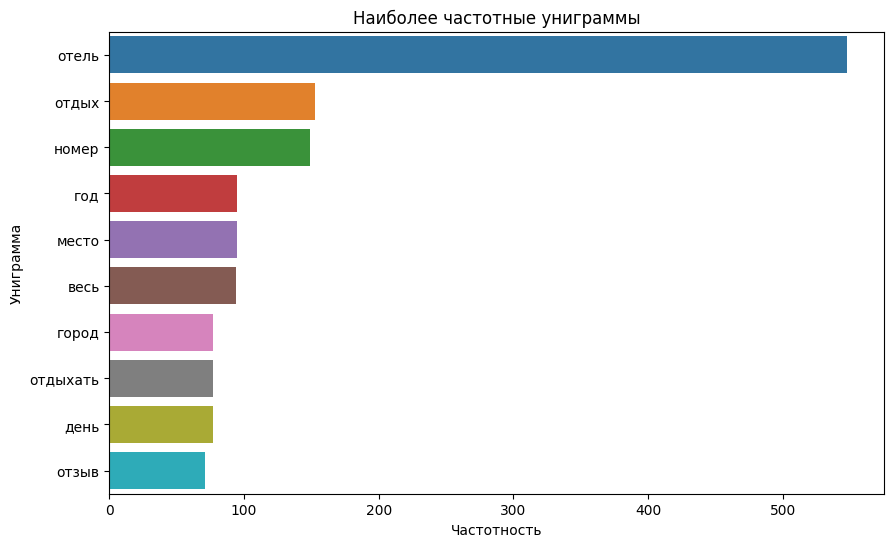

In [ ]:
# Получение списка наиболее частотных униграмм и их частотности
top_unigrams = unigram_freq.most_common(10)
top_unigram_words = [word for word, _ in top_unigrams]
top_unigram_freq = [freq for _, freq in top_unigrams]

# Создание датафрейма с данными
data = pd.DataFrame({'Униграмма': top_unigram_words, 'Частотность': top_unigram_freq})

# Создание столбчатой диаграммы униграмм
plt.figure(figsize=(10, 6))
sns.barplot(x='Частотность', y='Униграмма', data=data)
plt.xlabel('Частотность')
plt.ylabel('Униграмма')
plt.title('Наиболее частотные униграммы')

plt.show()

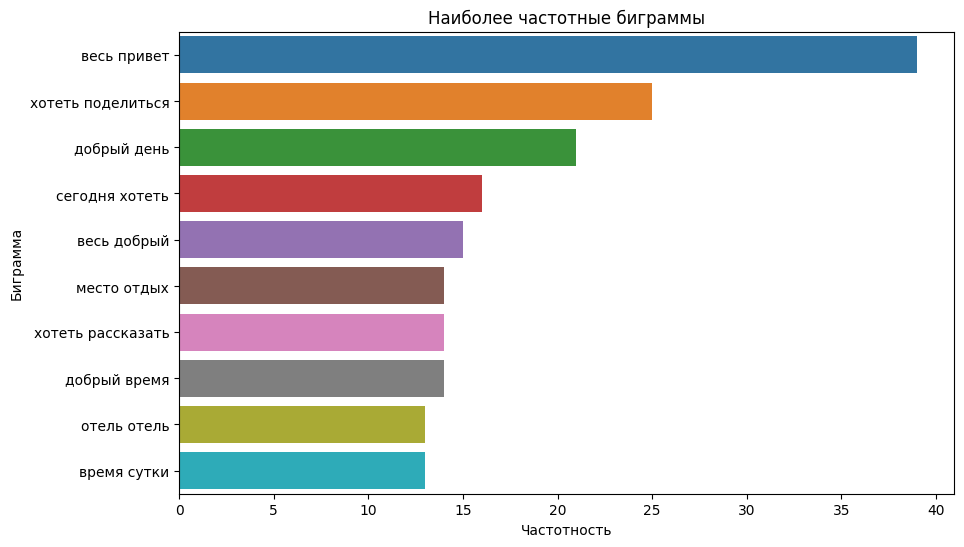

In [ ]:
# Получение списка наиболее частотных биграмм и их частотности
top_bigrams = bigram_freq.most_common(10)
top_bigram_words = [' '.join(bigram) for bigram, _ in top_bigrams]
top_bigram_freq = [freq for _, freq in top_bigrams]

# Создание датафрейма с данными
data = pd.DataFrame({'Биграмма': top_bigram_words, 'Частотность': top_bigram_freq})

# Создание столбчатой диаграммы униграмм
plt.figure(figsize=(10, 6))
sns.barplot(x='Частотность', y='Биграмма', data=data)
plt.xlabel('Частотность')
plt.ylabel('Биграмма')
plt.title('Наиболее частотные биграммы')

plt.show()

# Анализ тональности документов корпуса

In [ ]:
reviews_1.head()

,Review
0,"[неприятно, провести, отдых, отпуск, море, зад..."
1,"[небольшой, отель, город, сочи, недалеко, парк..."
2,"[захотеться, снова, сыграть, свадьба, славный,..."
3,"[решить, дать, ялтеинтурист, второй, шанс, реш..."
4,"[отдых, душа, дорогой, друг, больший, восторг,..."


In [ ]:
!pip install dostoevsky

In [ ]:
!python -m dostoevsky download fasttext-social-network-model

In [ ]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [ ]:
sentiments = []

for review in reviews_1['Review']:
    result = model.predict(review, k=1)
    sentiment = result[0]
    sentiment_label = list(sentiment.keys())[0]
    sentiment_value = list(sentiment.values())[0]
    sentiments.append({'Sentiment': sentiment_label, 'Value': sentiment_value})

reviews_2 = reviews_1.copy()
reviews_2[['Sentiment', 'Value']] = pd.DataFrame(sentiments)

reviews_2

,Review,Sentiment,Value
0,"[неприятно, провести, отдых, отпуск, море, зад...",positive,0.998022
1,"[небольшой, отель, город, сочи, недалеко, парк...",neutral,0.997537
2,"[захотеться, снова, сыграть, свадьба, славный,...",neutral,0.973251
3,"[решить, дать, ялтеинтурист, второй, шанс, реш...",neutral,1.000010
4,"[отдых, душа, дорогой, друг, больший, восторг,...",positive,0.245095
...,...,...,...
395,"[по, планета, круговерть, ходить, мы, бог, абх...",neutral,1.000010
396,"[уютный, база, отдых, гора, база, четыре, сезо...",neutral,0.672342
397,"[отличный, отдых, семья, замечательный, отельо...",positive,1.000010
398,"[хороший, отель, центр, каир, категория, ценак...",positive,0.961544


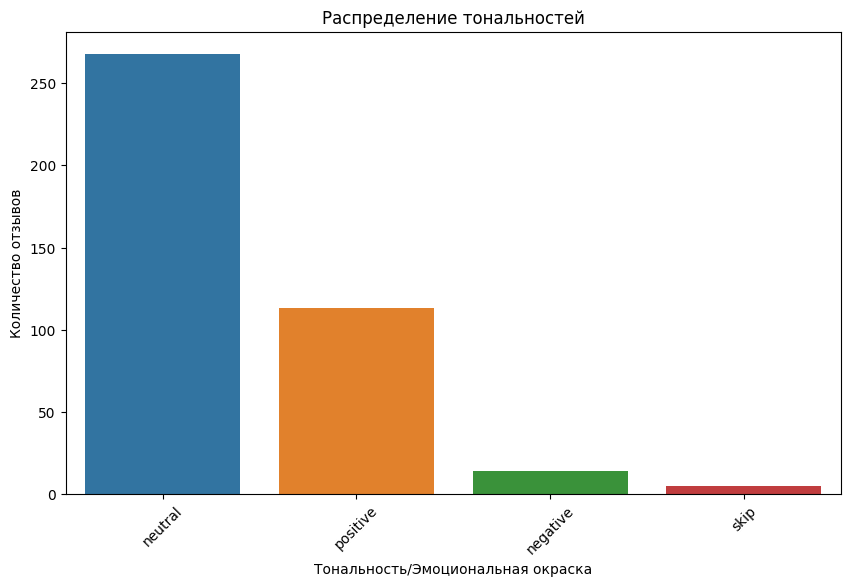

In [ ]:
# Подсчет количества каждой тональности
sentiment_counts = reviews_2['Sentiment'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Тональность/Эмоциональная окраска')
plt.ylabel('Количество отзывов')
plt.title('Распределение тональностей')
plt.xticks(rotation=45)
plt.show()

# Тематическое моделирование

Для определения оптимального количества тем можно использовать метрику Coherence Score, которая оценивает качество тематической модели на основе семантической близости топ-слов, относящихся к одной теме. Чем выше значение Coherence Score, тем лучше модель. Можно построить несколько моделей с разным количеством тем и выбрать ту, у которой значение Coherence Score наибольшее.

Number of topics: 3, Coherence Score: 0.25687169704940893
Number of topics: 4, Coherence Score: 0.25502984095367165
Number of topics: 5, Coherence Score: 0.323259539894615
Number of topics: 6, Coherence Score: 0.2685454670799264
Number of topics: 7, Coherence Score: 0.250332833540883
Number of topics: 8, Coherence Score: 0.26763088549608094
Number of topics: 9, Coherence Score: 0.2731938867693338
Number of topics: 10, Coherence Score: 0.2608654799657043
Number of topics: 11, Coherence Score: 0.25519683578768254
Number of topics: 12, Coherence Score: 0.26318870270100586
Number of topics: 13, Coherence Score: 0.24642367094126263
Number of topics: 14, Coherence Score: 0.24777352251292503
Number of topics: 15, Coherence Score: 0.25972373451300607


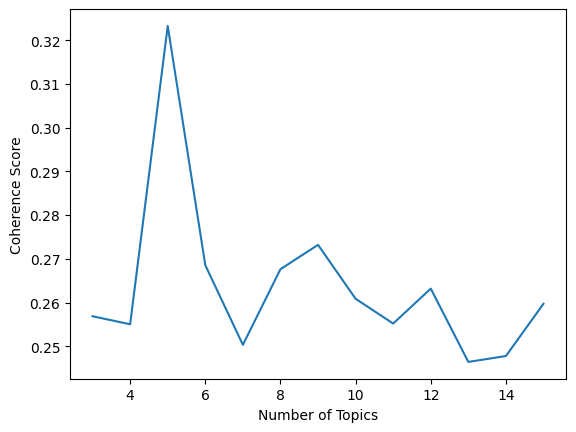

In [ ]:
import matplotlib.pyplot as plt
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

texts = list(reviews_1['Review'])
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in texts]

coherence_scores = []
for num_topics in range(3, 16):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
    print(f"Number of topics: {num_topics}, Coherence Score: {coherence_lda}")

plt.plot(range(3, 16), coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

 Надо исследовать пики и оценить эмпирически, какое действительно количество тем наблюдается. Также можно вернуться к предобработке текста и попытаться улучшить результат обработкой стоп-слов и другими методами. Здесь все зависит исключительно от данных. Чем меньше в них будет пересечений, тем лучше  разбиение.

In [ ]:
import numpy as np
n_topic = np.argmax(coherence_scores)+3 #т.к. начинается с 3
n_topic

5

In [ ]:
#Наиболее частотные ключевые слова из каждой из тем
topics = lda_model.show_topics(num_topics=num_topics, num_words=10)  
for topic in topics:
  print(topic)

(0, '0.023*"время" + 0.022*"поэтому" + 0.022*"понравиться" + 0.021*"сутки" + 0.020*"мы" + 0.020*"больший" + 0.019*"первый" + 0.019*"неплохой" + 0.018*"добрый" + 0.017*"гостевой"')
(1, '0.034*"отдых" + 0.028*"ребёнок" + 0.019*"добрый" + 0.017*"маленький" + 0.017*"день" + 0.016*"который" + 0.016*"год" + 0.016*"самый" + 0.016*"весь" + 0.014*"дешёвый"')
(2, '0.036*"санаторий" + 0.019*"центр" + 0.018*"посещение" + 0.017*"хороший" + 0.014*"бассейн" + 0.014*"весь" + 0.013*"город" + 0.012*"хотеть" + 0.011*"краснодар" + 0.011*"выбор"')
(3, '0.029*"отзыв" + 0.029*"отдых" + 0.020*"отдыхать" + 0.019*"год" + 0.016*"гостиница" + 0.014*"ребёнок" + 0.014*"долго" + 0.013*"москва" + 0.012*"номер" + 0.010*"бассейн"')
(4, '0.025*"отдых" + 0.023*"хотеть" + 0.023*"впечатление" + 0.020*"год" + 0.019*"поделиться" + 0.017*"отпуск" + 0.016*"город" + 0.014*"отзыв" + 0.014*"сегодня" + 0.011*"любить"')
(5, '0.041*"место" + 0.037*"отдых" + 0.033*"весь" + 0.022*"берег" + 0.018*"хотеть" + 0.017*"добрый" + 0.016*"прив

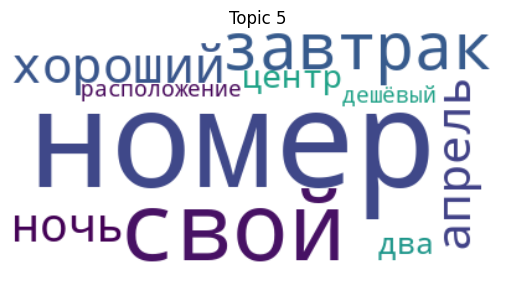

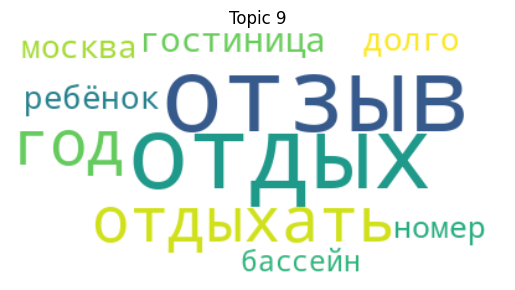

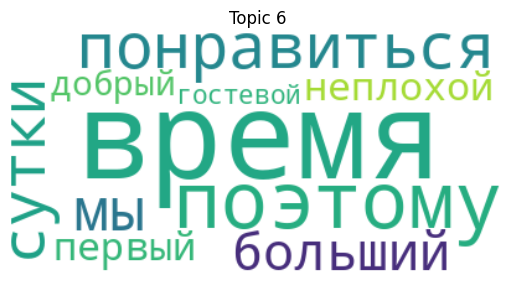

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sort coherence scores and retrieve the top three topic numbers
top_topics = sorted(enumerate(coherence_scores), key=lambda x: x[1], reverse=True)[:3]
top_topic_nums = [topic_num for topic_num, coherence_score in top_topics]

# Generate word clouds for the top three topics
for topic_num in top_topic_nums:
    topic_words = lda_model.show_topic(topic_num - 3, topn=10)  # Change topn value to adjust the number of words
    words = {word: score for word, score in topic_words}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_num + 3}")
    plt.show()


# Построение графовой модели корпуса

In [ ]:
# Создание пар слов
pairs = []
for doc in reviews_1.Review.tolist():
  if doc:
    b = list((nltk.bigrams(doc)))
    if b:
      pairs.extend(b)
len(pairs)

11957

In [ ]:
from collections import Counter

In [ ]:
pairs = [tuple(sorted(pair)) for pair in pairs]

In [ ]:
word_pairs = dict(Counter(pairs))
print(len(word_pairs))

10064


In [ ]:
word_pairs = [(pair[0], pair[1], val) for pair, val in word_pairs.items() if val > 3]
print(len(word_pairs))
word_pairs[:10]

161


[('год', 'июль', 4),
 ('небольшой', 'отель', 6),
 ('город', 'отель', 4),
 ('весь', 'привет', 40),
 ('выбор', 'отель', 15),
 ('город', 'центр', 12),
 ('искать', 'отель', 6),
 ('бассейн', 'подогревать', 5),
 ('дорогой', 'друг', 4),
 ('поделиться', 'хотеть', 25)]

In [ ]:
!pip install networkx --upgrade

Создание графа

In [ ]:
import networkx as nx

G = nx.Graph()
edges = word_pairs
edges[:10], len(edges)

([('год', 'июль', 4),
  ('небольшой', 'отель', 6),
  ('город', 'отель', 4),
  ('весь', 'привет', 40),
  ('выбор', 'отель', 15),
  ('город', 'центр', 12),
  ('искать', 'отель', 6),
  ('бассейн', 'подогревать', 5),
  ('дорогой', 'друг', 4),
  ('поделиться', 'хотеть', 25)],
 161)

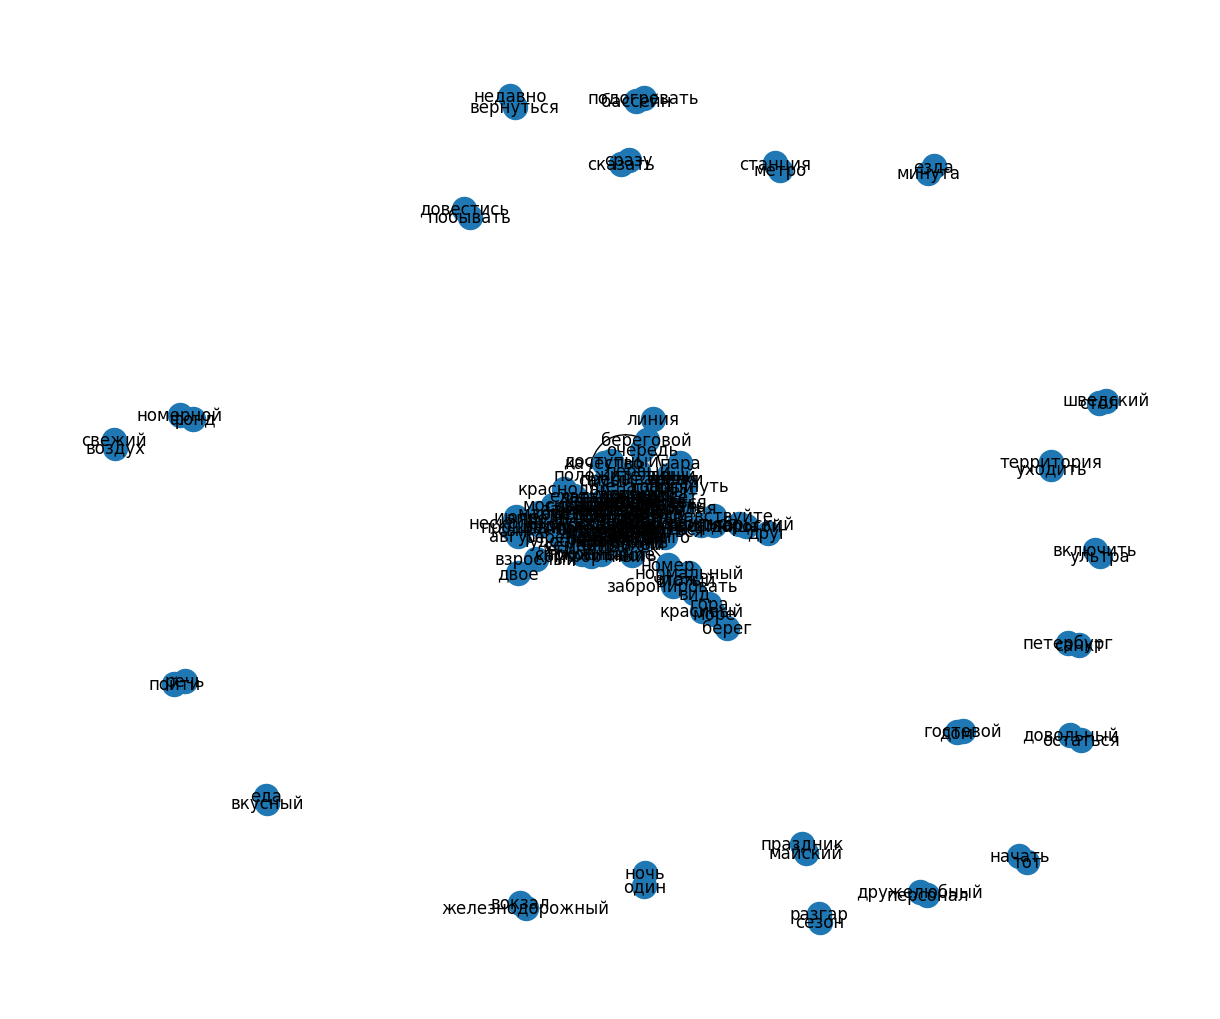

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(12,10))
G.add_weighted_edges_from(edges)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

У нас получились изолированные пары слов: дружелюбный персонал, станция метро, шведский стол и другие. Это затрудняет читаемость графа. Удалим вершины со степенью меньше 2

In [ ]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(remove)

In [ ]:
remove_edge = [pair for pair in G.edges() if pair[0] in remove and pair[1] in remove]
G.remove_edges_from(remove_edge)

In [ ]:
remove = [node for node, degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)

In [ ]:
node_sizes = [deg*50 for node, deg in dict(G.degree()).items()]

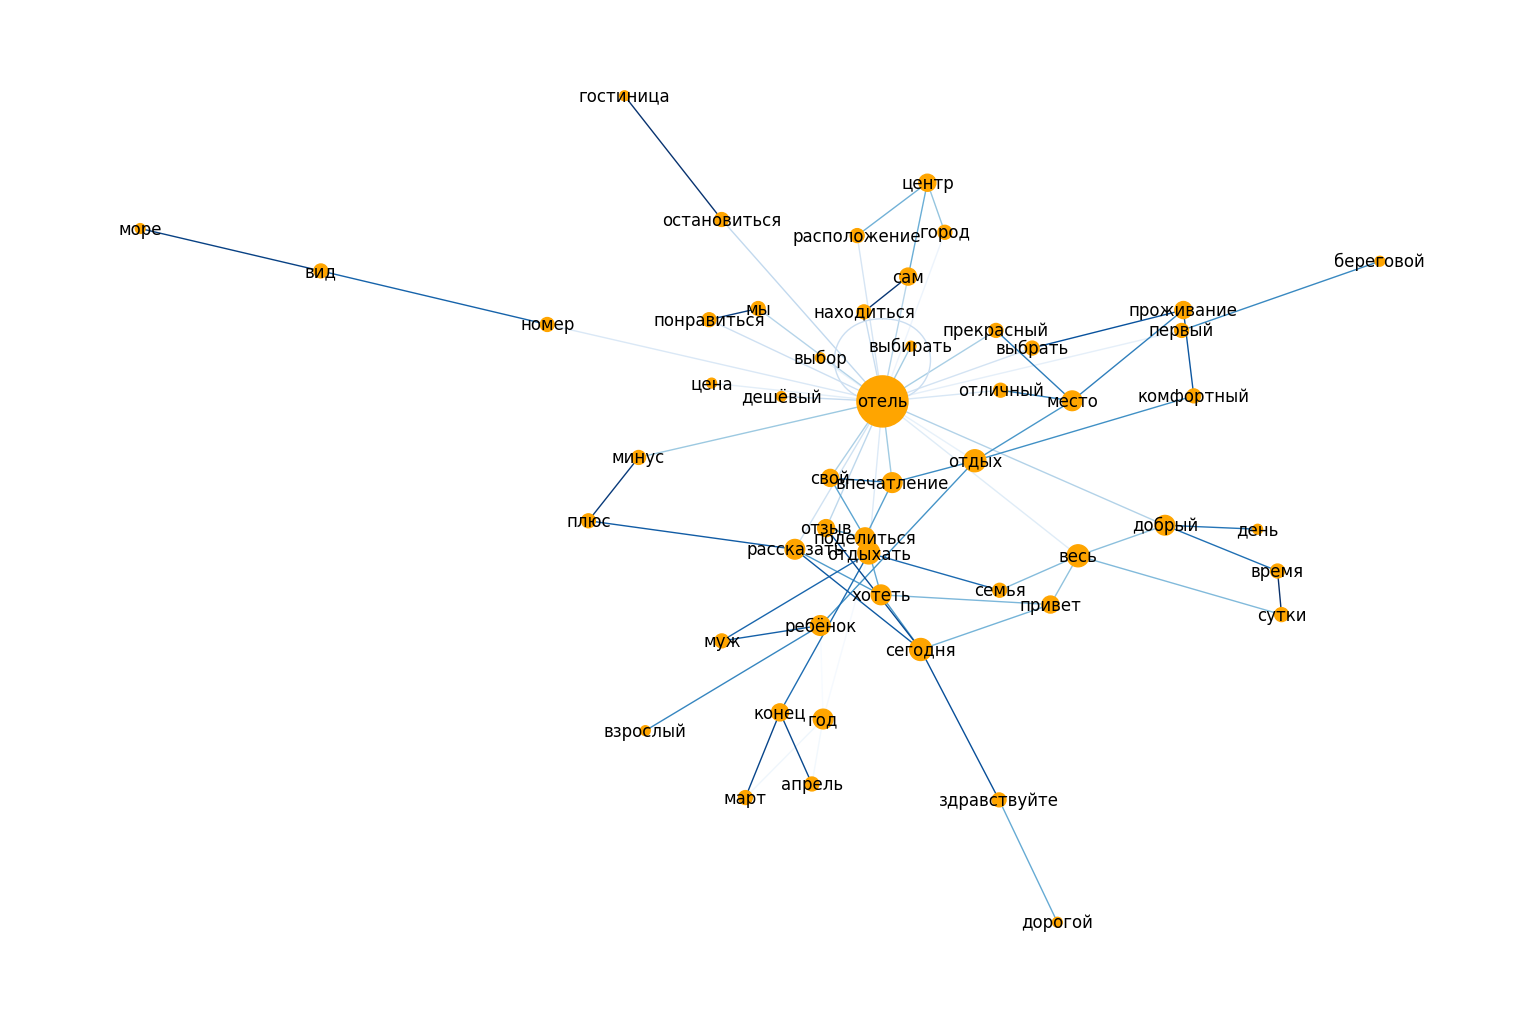

In [ ]:
plt.figure(figsize=(15,10))
pos = nx.layout.spring_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='orange', node_size=node_sizes, edgelist=list(G.edges()), edge_color=range(len(G.edges())), width=1.0, with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

На графе можно отследить связи между самыми частыми словами.